<a href="https://colab.research.google.com/github/DKAbir111/Human-Disease-Prediction_FRP/blob/main/1712-New_Human_Disease_Prediction__EDA_Final_Year_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library for managing warnings during code execution

# Suppressing warning messages to keep the output clean
warnings.filterwarnings("ignore")

**Mount Drive**

In [429]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read CSV for disease data analysis**

In [430]:
df=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/dataset.csv")

In [431]:
df.head(5)# Displaying the first 5 rows of the training data DataFrame

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen From the data**

In [432]:
# Iterate through each column in the Data
for col in df.columns:

    # Replace underscores with spaces in the values of the current column
    df[col] = df[col].str.replace('_', ' ')

# Display the few sample rows of the modified Data
df.sample(5)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
2594,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,Pneumonia,chills,fatigue,cough,high fever,breathlessness,sweating,malaise,phlegm,chest pain,fast heart rate,rusty sputum,NaN,NaN,NaN,NaN,NaN,NaN
2314,Common Cold,continuous sneezing,chills,cough,high fever,headache,swelled lymph nodes,malaise,phlegm,throat irritation,redness of eyes,sinus pressure,runny nose,congestion,chest pain,loss of smell,muscle pain,NaN
3490,Peptic ulcer diseae,vomiting,indigestion,loss of appetite,abdominal pain,passage of gases,internal itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2828,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove the trailing space from the symptom columns**

In [433]:
# Get the column names of the original DataFrame
cols = df.columns
# Flatten the DataFrame values into a 1D array
data = df[cols].values.flatten()
# Create a pandas Series from the flattened data
s = pd.Series(data)
# Remove leading and trailing whitespaces from each element in the Series
s = s.str.strip()
# Reshape the 1D array back into the original DataFrame shape
s = s.values.reshape(df.shape)
# Create a new DataFrame with the cleaned values and original column names
df = pd.DataFrame(s, columns=df.columns)
# Display the first few rows of the cleaned DataFrame
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Describe some characteristics of data**

In [434]:
print(df.shape)#Shape of data set

(4920, 18)


In [435]:
df.dtypes# Retrieving the data types of each column in the DataFrame 'data'

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [436]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [437]:
df.info()# Print a summary of the DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


**Checking the null value of the data**

In [438]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)


            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4          348
Symptom_5         1206
Symptom_6         1986
Symptom_7         2652
Symptom_8         2976
Symptom_9         3228
Symptom_10        3408
Symptom_11        3726
Symptom_12        4176
Symptom_13        4416
Symptom_14        4614
Symptom_15        4680
Symptom_16        4728
Symptom_17        4848


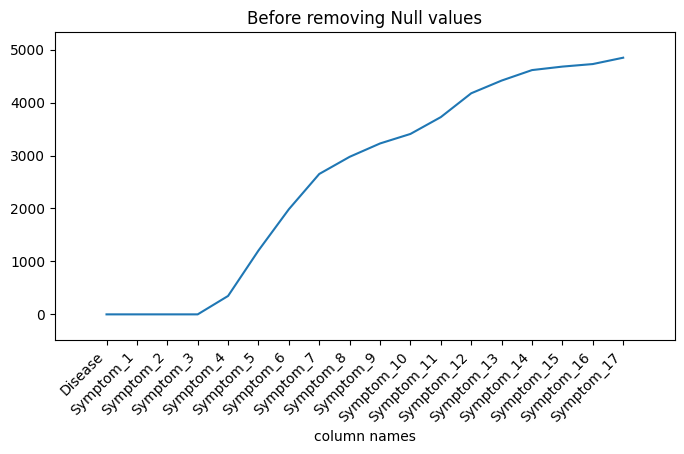

In [439]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('Before removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()


**Fill the NaN values with zero**

In [440]:
df = df.fillna(0)
df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
1492,Common Cold,chills,fatigue,cough,high fever,headache,swelled lymph nodes,malaise,phlegm,throat irritation,redness of eyes,sinus pressure,runny nose,congestion,chest pain,loss of smell,muscle pain,0
3288,Gastroenteritis,vomiting,sunken eyes,dehydration,diarrhoea,0,0,0,0,0,0,0,0,0,0,0,0,0
1809,Chicken pox,itching,skin rash,fatigue,lethargy,high fever,headache,loss of appetite,mild fever,malaise,red spots over body,0,0,0,0,0,0,0
3769,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,0,0,0,0,0,0,0,0,0,0,0,0,0
560,Malaria,chills,vomiting,high fever,sweating,headache,nausea,muscle pain,0,0,0,0,0,0,0,0,0,0


In [441]:
# Extract all symptom columns
symptom_columns = df.columns[1:]  # Exclude the first column (assuming it is the disease column)

# Create a new DataFrame with symptoms only
symptoms_df = df[symptom_columns]

# Reshape the DataFrame to have a single column for symptoms
all_symptoms = symptoms_df.values.flatten()

# Filter out the value 0 from the symptoms
filtered_symptoms = all_symptoms[all_symptoms != 0]

# Count occurrences of each symptom (excluding 0)
symptom_counts = pd.Series(filtered_symptoms).value_counts()

# Display all unique symptoms and their corresponding count values
for rank, (symptom, count) in enumerate(symptom_counts.items(), start=1):
    print(f"{rank}. {symptom}, Count: {count}")

1. fatigue, Count: 1932
2. vomiting, Count: 1914
3. high fever, Count: 1362
4. loss of appetite, Count: 1152
5. nausea, Count: 1146
6. headache, Count: 1134
7. abdominal pain, Count: 1032
8. yellowish skin, Count: 912
9. yellowing of eyes, Count: 816
10. chills, Count: 798
11. skin rash, Count: 786
12. malaise, Count: 702
13. chest pain, Count: 696
14. joint pain, Count: 684
15. sweating, Count: 678
16. itching, Count: 678
17. dark urine, Count: 570
18. diarrhoea, Count: 564
19. cough, Count: 564
20. irritability, Count: 474
21. muscle pain, Count: 474
22. excessive hunger, Count: 462
23. lethargy, Count: 456
24. weight loss, Count: 456
25. breathlessness, Count: 450
26. phlegm, Count: 354
27. mild fever, Count: 354
28. swelled lymph nodes, Count: 348
29. blurred and distorted vision, Count: 342
30. loss of balance, Count: 342
31. dizziness, Count: 336
32. abnormal menstruation, Count: 240
33. muscle weakness, Count: 234
34. depression, Count: 234
35. red spots over body, Count: 234
36

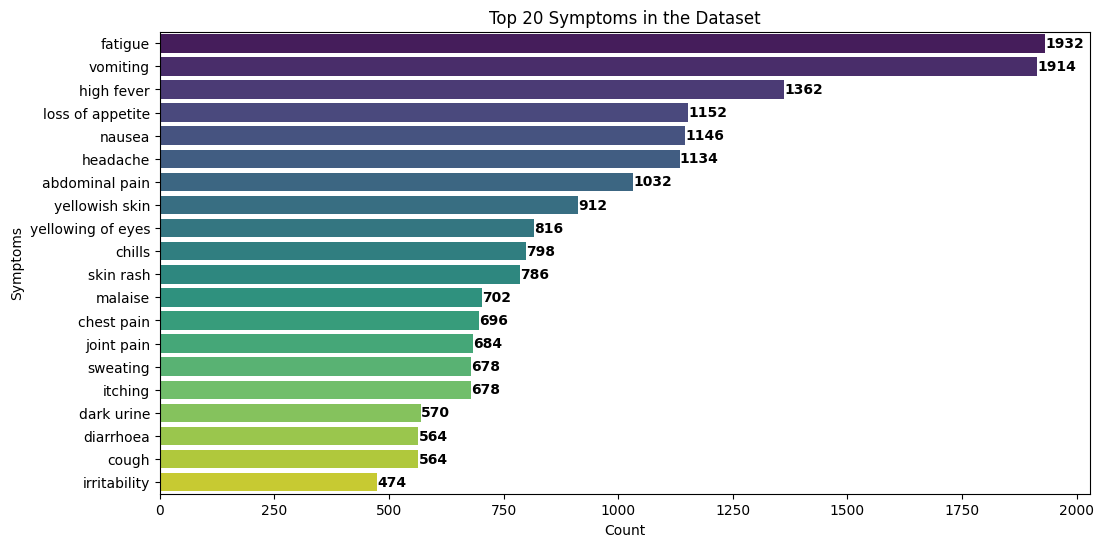

In [442]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for the top N symptoms
top_n = 20  # You can adjust this based on the number of symptoms you want to display
top_symptoms = symptom_counts.head(top_n)

# Plotting
ax = sns.barplot(x=top_symptoms.values, y=top_symptoms.index, palette='viridis')

# Annotate each bar with its count
for i, v in enumerate(top_symptoms.values):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

# Customize the plot
plt.title(f'Top {top_n} Symptoms in the Dataset')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.show()

In [443]:
# Create a mapping of symptoms to their priority based on counts
symptom_priority = {symptom: rank for rank, (symptom, _) in enumerate(symptom_counts.items(), start=1)}

# Encode the original DataFrame based on symptom priority
df[symptom_columns] = df[symptom_columns].applymap(lambda x: symptom_priority[x] if x != 0 else 0)

# Display the modified DataFrame with encoded values
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,16,11,120,118,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,11,120,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,16,120,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,16,11,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,16,11,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Symptom severity rank**

In [444]:
# dfs=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/Symptom-severity.csv")

In [445]:
# dfs.sample(5)

In [446]:
# dfs['Symptom'] = dfs['Symptom'].str.replace('_',' ')
# dfs.head(5)

In [447]:
# symptoms_data = pd.DataFrame(dfs)

# # Create groups based on weights
# groups = symptoms_data.groupby('weight')

# # Print each group
# for weight, group in groups:
#     print(f"Weight {weight}: {', '.join(group['Symptom'].tolist())}")

**Total Unique Symptom according to Symptom Sevarity list**

In [448]:
# dfs['Symptom'].unique()

**Encode Symptomn of df(Disease data) according to the sevarity of syptoms from dfs(Symptom Sevarity)**

In [449]:
# # Extract the values from the original DataFrame
# vals = df.values

# # Get unique symptoms from another DataFrame 'dfs'
# symptoms = dfs['Symptom'].unique()

# # Iterate over each unique symptom
# for i in range(len(symptoms)):
#     # Replace values in 'vals' with corresponding weights from 'dfs'
#     vals[vals == symptoms[i]] = dfs[dfs['Symptom'] == symptoms[i]]['weight'].values[0]

# # Create a new DataFrame 'd' with the updated values and original column names
# dummy = pd.DataFrame(vals, columns=cols)

# # Display the first few rows of the updated DataFrame
# dummy.head()


**Assign symptoms with no rank to zero**

In [450]:
# dummy = dummy.replace('dischromic  patches', 0)
# dummy = dummy.replace('spotting  urination',0)
# df = dummy.replace('foul smell of urine',0)
# df.head(10)

**Checking the data frame after handling null value**

In [451]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)

            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4            0
Symptom_5            0
Symptom_6            0
Symptom_7            0
Symptom_8            0
Symptom_9            0
Symptom_10           0
Symptom_11           0
Symptom_12           0
Symptom_13           0
Symptom_14           0
Symptom_15           0
Symptom_16           0
Symptom_17           0


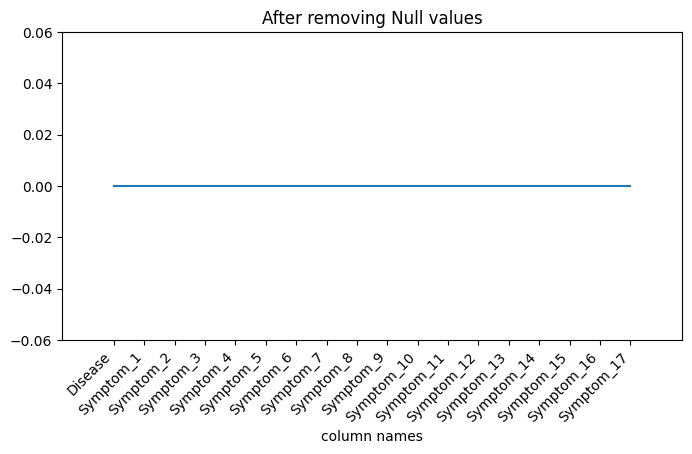

In [452]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('After removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()


**Total number of symptom and predicted Disease**

In [453]:
# print("Number of symptoms used to identify the disease ",len(dfs['Symptom'].unique()))
# print("Number of diseases that can be identified ",len(df['Disease'].unique()))

In [454]:
df['Disease'].unique()# Retrieving unique values in the 'attack_cat' column

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [455]:
# Function to plot a bar graph of value counts for a given feature
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

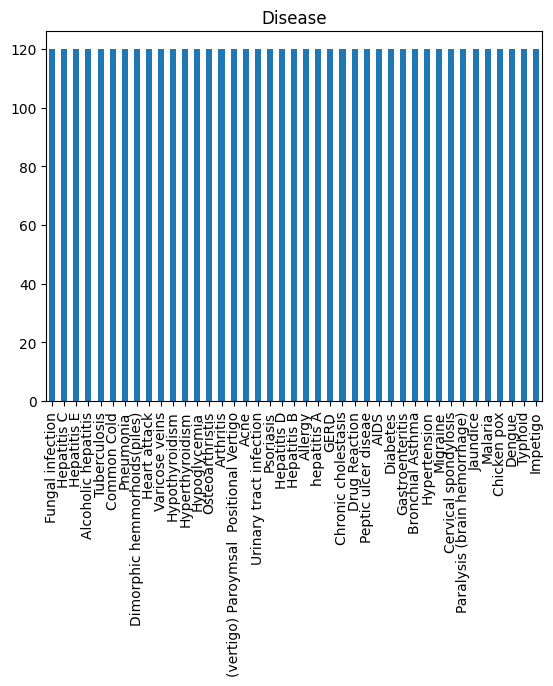

In [456]:
plt.title("Disease")# Setting the title for the bar graph
bar_graph('Disease')# Calling the bar_graph function to plot value counts for the 'Disease' column

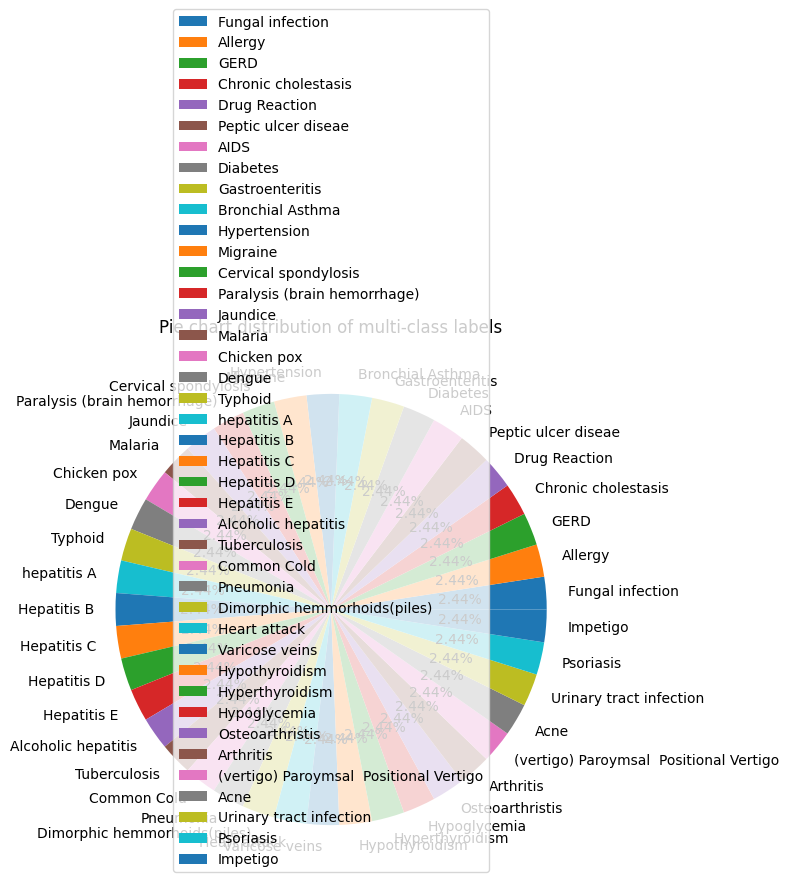

In [457]:
# Setting the figure size for the pie chart
plt.figure(figsize=(15, 7))

# Creating a pie chart based on the value counts of 'Disease'
plt.pie(df['Disease'].value_counts(), labels=df['Disease'].unique(), autopct='%0.2f%%')

# Setting the title for the pie chart
plt.title('Pie chart distribution of multi-class labels')

# Adding a legend to the pie chart
plt.legend()

# Saving the pie chart as an image file
plt.savefig('Pie_chart_multi.png')

# Displaying the pie chart
plt.show()



# **Other Discussion**

In [458]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

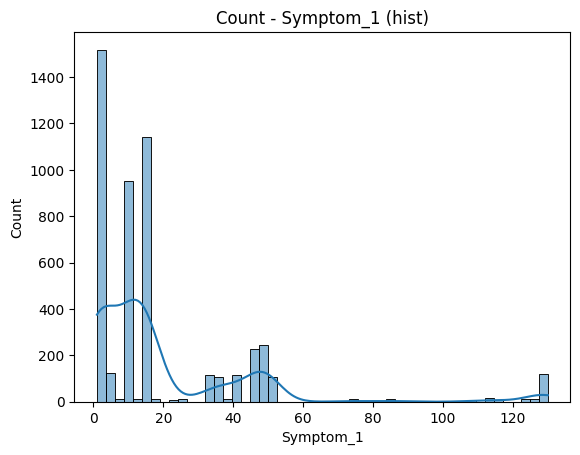

In [459]:
sns.histplot(df.Symptom_1, bins = 50, kde = True)
plt.title('Count - Symptom_1 (hist)')
plt.show()

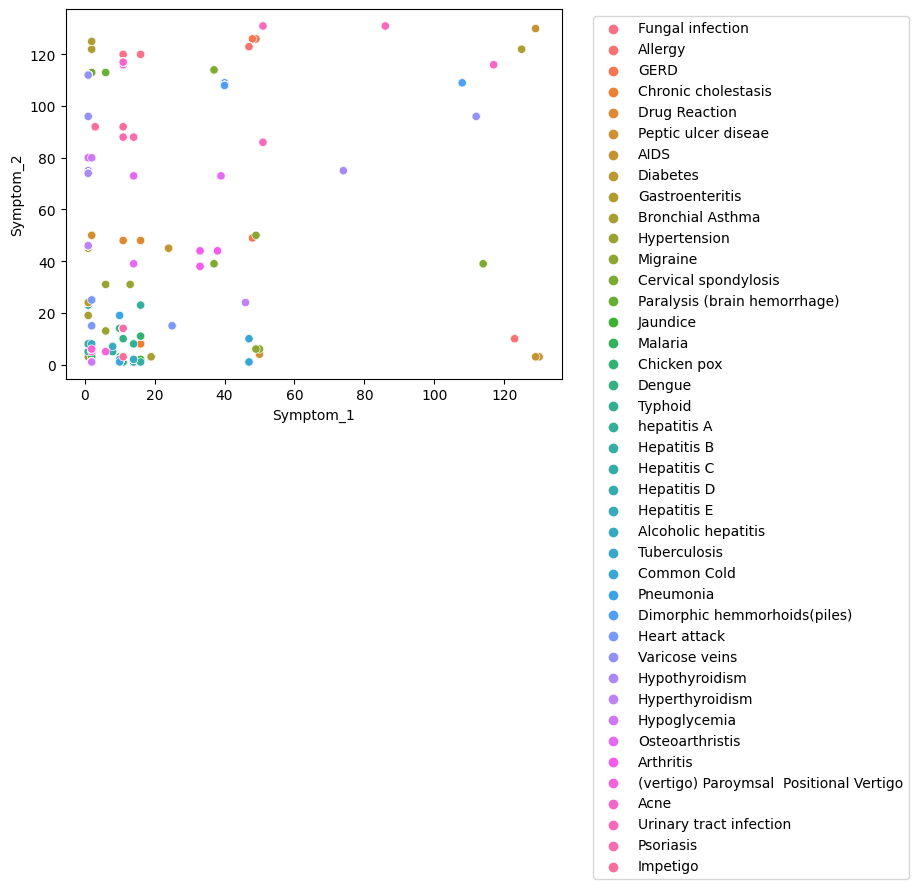

In [460]:
# Assuming df is your DataFrame

sns.scatterplot(data=df, x='Symptom_1', y='Symptom_2', hue='Disease')

# You can use the bbox_to_anchor and loc parameters to set the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

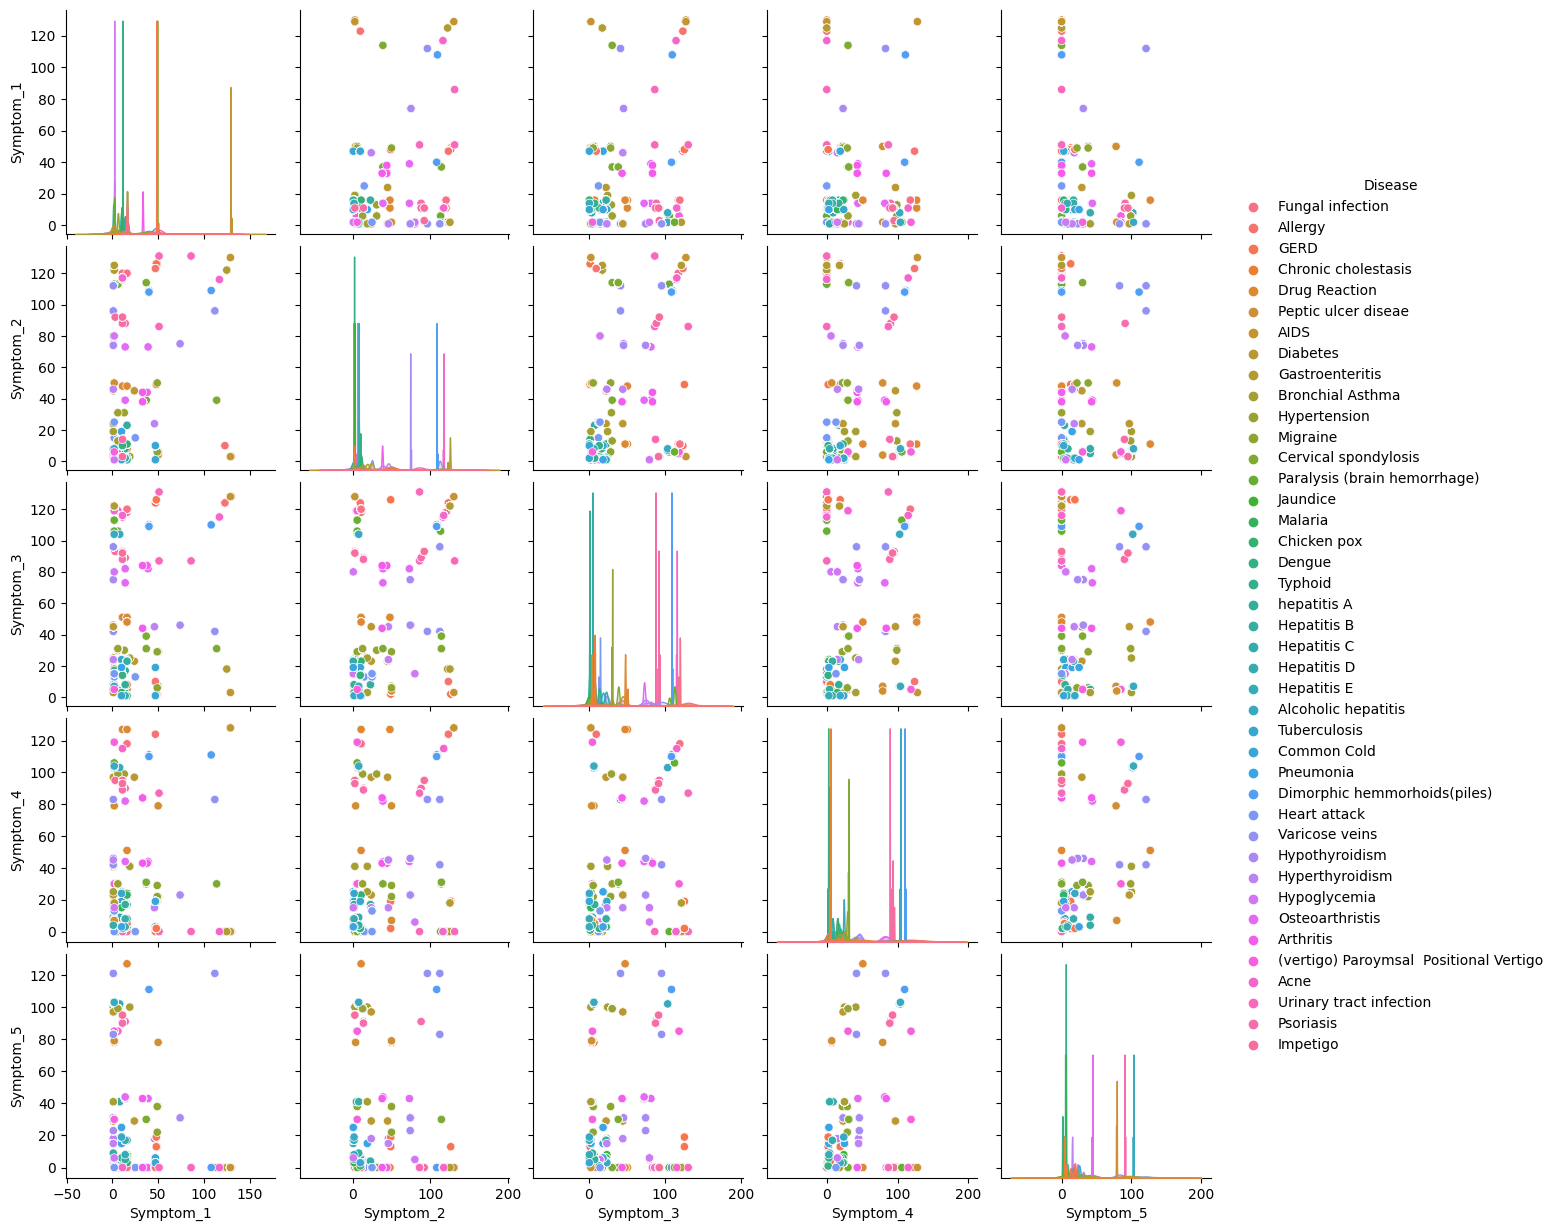

In [461]:
sns.pairplot(data = df,
             x_vars = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4','Symptom_5'],
             y_vars = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4','Symptom_5'],
            hue = 'Disease')
plt.show()

In [462]:
# sns.scatterplot(data = df,
#             x = 'Symptom_1',
#             y = 'Symptom_18',
#             hue = 'Disease')
# plt.show()

In [463]:
# sns.barplot(data = df,
#                x = 'Symptom_4',
#                y = 'Symptom_5',
#                hue = 'Disease')
# plt.show()

# **Heat Map with Corelational Matrix**

In [464]:
# Importing the LabelEncoder class from scikit-learn for categorical variable encoding
from sklearn.preprocessing import LabelEncoder

In [465]:
# Creating a copy of the DataFrame for heatmap visualization
heatmap = df.copy()

# List of categorical columns to be encoded
cat_cols = ["Disease"]

# Initializing a LabelEncoder
le = LabelEncoder()

# Encoding categorical columns in the DataFrame
for col in cat_cols:
    heatmap[col] = le.fit_transform(heatmap[col])

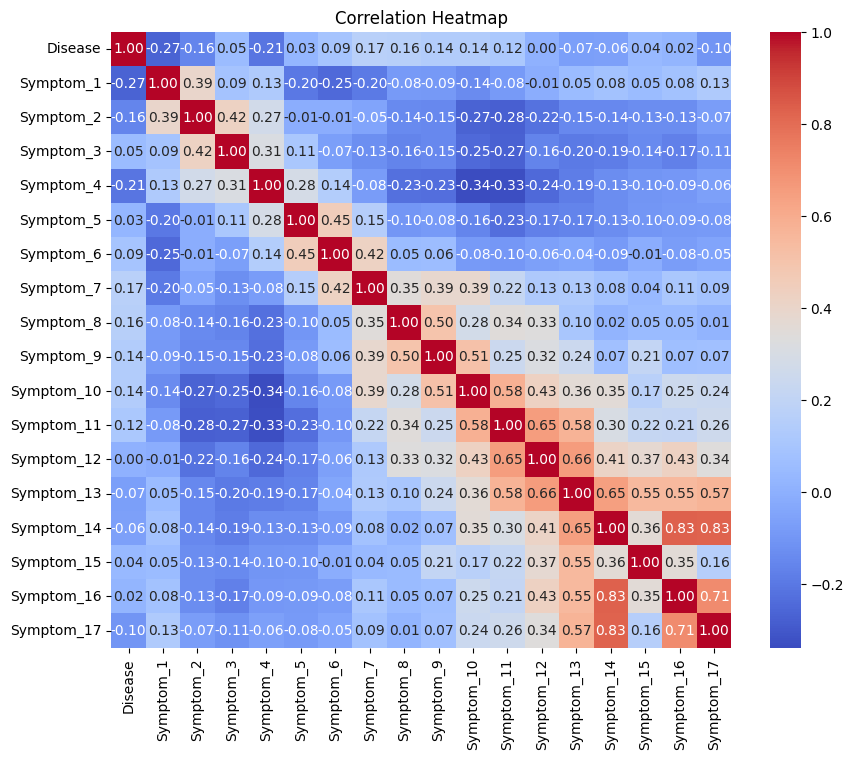

In [466]:
dummy = heatmap.copy()

# Creating a correlation matrix from the selected columns in the DataFrame 'dummy'
correlation_matrix = dummy.corr()

# Setting the figure size for the correlation heatmap
plt.figure(figsize=(10, 8))

# Creating a heatmap with annotations, using the 'coolwarm' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Setting the title for the correlation heatmap
plt.title("Correlation Heatmap")

# Displaying the correlation heatmap
plt.show()


In [467]:
df.shape

(4920, 18)

In [468]:
X = df.drop(['Disease'], axis=1) #independent columns
y = df[['Disease']]   #target column

In [469]:
y=le.fit_transform(y)

**Feature Selection**

In [470]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Instantiate SelectKBest with the desired score function (f_classif in this case)
test = SelectKBest(score_func=f_classif)

# Fit SelectKBest on the features and target variable
test.fit(X, y)

# Extract the scores of the features
scores = pd.DataFrame(test.scores_)

# Create DataFrames for feature names and their corresponding scores
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features', 'Score']


In [471]:
# Print the top 17 features based on their scores
print(featureScores.nlargest(17, 'Score'))

      Features       Score
12  Symptom_13  689.862714
11  Symptom_12  565.930691
0    Symptom_1  565.358588
1    Symptom_2  555.108468
10  Symptom_11  521.481632
9   Symptom_10  506.158078
2    Symptom_3  490.303461
5    Symptom_6  383.324237
8    Symptom_9  346.279660
4    Symptom_5  343.771694
7    Symptom_8  319.957391
13  Symptom_14  315.707222
15  Symptom_16  306.736331
6    Symptom_7  274.922218
3    Symptom_4  213.174567
14  Symptom_15  210.378875
16  Symptom_17  178.500000


**Scalling- Using Strandard Scaling**

In [472]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [473]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3936, 17)
Testing set shape: (984, 17)


In [474]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#x' = (x- mean)/std

# transform train and test sets
X_train_new = scaler.fit_transform(X_train)
X_test_new= scaler.transform(X_test)

In [475]:
X_train_new

array([[-0.12811069, -0.5867655 , -0.93080277, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.36569999, -0.79689491, -0.93080277, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.12811069, -0.82024263, -0.43269648, ..., -0.17865014,
        -0.19244027, -0.12336106],
       ...,
       [-0.32610177, -0.61011321, -0.63646724, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.12811069, -0.5867655 ,  1.76349945, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.12811069, -0.5867655 ,  0.1333334 , ..., -0.17865014,
        -0.19244027, -0.12336106]])

In [476]:
X_test_new

array([[-0.32610177,  1.8647443 ,  1.65029348, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.32610177,  1.88809201,  1.67293467, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.72208393,  0.23040443, -0.41005528, ..., -0.17865014,
        -0.19244027, -0.12336106],
       ...,
       [-0.32610177, -0.61011321, -0.63646724, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.32610177,  1.88809201,  1.65029348, ..., -0.17865014,
        -0.19244027, -0.12336106],
       [-0.68248571,  2.07487371,  1.80878184, ..., -0.17865014,
        -0.19244027, -0.12336106]])

In [477]:
X_train= np.round(X_train_new, 1)
X_test= np.round(X_test_new, 1)

In [478]:
print("X_train after scalling = \n",X_train)
print("\nX_test after scalling = \n",X_test)

X_train after scalling = 
 [[-0.1 -0.6 -0.9 ... -0.2 -0.2 -0.1]
 [-0.4 -0.8 -0.9 ... -0.2 -0.2 -0.1]
 [-0.1 -0.8 -0.4 ... -0.2 -0.2 -0.1]
 ...
 [-0.3 -0.6 -0.6 ... -0.2 -0.2 -0.1]
 [-0.1 -0.6  1.8 ... -0.2 -0.2 -0.1]
 [-0.1 -0.6  0.1 ... -0.2 -0.2 -0.1]]

X_test after scalling = 
 [[-0.3  1.9  1.7 ... -0.2 -0.2 -0.1]
 [-0.3  1.9  1.7 ... -0.2 -0.2 -0.1]
 [-0.7  0.2 -0.4 ... -0.2 -0.2 -0.1]
 ...
 [-0.3 -0.6 -0.6 ... -0.2 -0.2 -0.1]
 [-0.3  1.9  1.7 ... -0.2 -0.2 -0.1]
 [-0.7  2.1  1.8 ... -0.2 -0.2 -0.1]]


In [479]:
X_train.dtype

dtype('float64')

**Cross Validation**

In [480]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create an instance of Logistic Regression model
logr1 = LogisticRegression()

# Perform 5-fold cross-validation and obtain scores
score = cross_val_score(logr1, X, y, cv=5)

# Print the cross-validation scores for each fold
print("Cross Validation Scores are {}".format(score))

# Print the average cross-validation score (test data accuracy)
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))



Cross Validation Scores are [0.7601626  0.74695122 0.88211382 0.97560976 0.97560976]
Average Cross Validation (Test data accuracy): 0.8680894308943088


# **Randomly choose 5,10,15 and 17 symptom for prediction**

In [481]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
from sklearn.metrics import accuracy_score

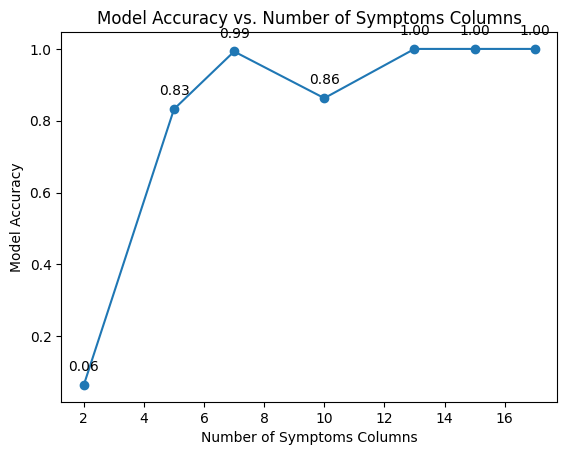

In [482]:
accuracies = []
column_counts = []

# Randomly select 5, 10, 15, and 17 symptoms columns
for i in [2, 5,7,10,13, 15, 17]:
    selected_columns = np.random.choice(X.columns, i, replace=False)
    X_subset = X[selected_columns]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train the model
    model_rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_model = model_rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_model)

    # Append results to lists
    accuracies.append(accuracy)
    column_counts.append(i)

# Plot the results with accuracy annotations
plt.plot(column_counts, accuracies, marker='o')
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2f}', (column_counts[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Model Accuracy vs. Number of Symptoms Columns')
plt.xlabel('Number of Symptoms Columns')
plt.ylabel('Model Accuracy')
plt.show()

# **Fixed Column**

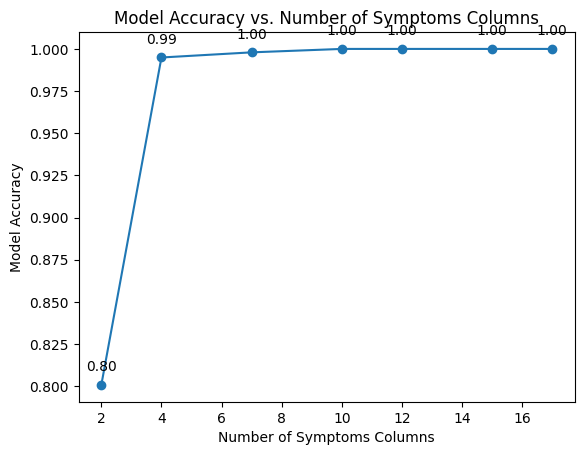

In [483]:
accuracies = []
column_counts = []

# Fixed number of columns: 5, 10, 15, and all columns
for i in [2,4,7, 10,12, 15, X.shape[1]]:
    selected_columns = X.columns[:i]
    X_subset = X[selected_columns]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train the model
    model_rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_model = model_rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_model)

    # Append results to lists
    accuracies.append(accuracy)
    column_counts.append(i)

# Plot the results with accuracy annotations
plt.plot(column_counts, accuracies, marker='o')
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2f}', (column_counts[i], accuracies[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Model Accuracy vs. Number of Symptoms Columns')
plt.xlabel('Number of Symptoms Columns')
plt.ylabel('Model Accuracy')
plt.show()


# **ROC Curve for multiclass classifire(Using Random Forest)**

In [484]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

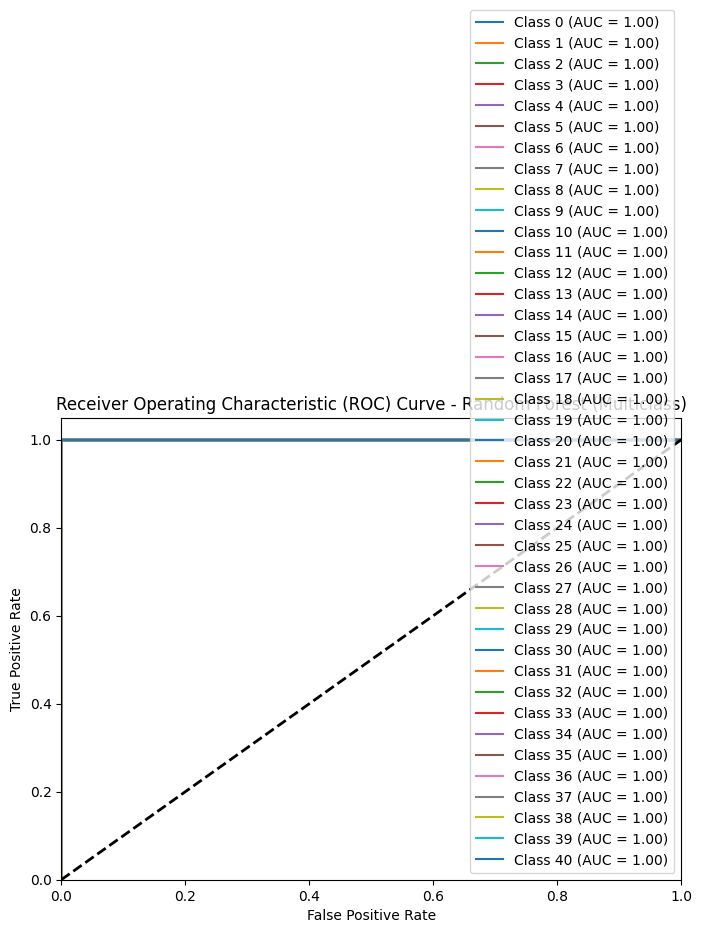

In [485]:
# Binarize the output labels for multi-class classification
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Train a classifier using One-vs-Rest strategy (Random Forest in this example)
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # Area Under the Curve (AUC)

n_classes = y_train_bin.shape[1]

# Calculate ROC curves and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Multiclass)')
plt.legend(loc="lower right")
plt.show()


# **Logistic Regression**

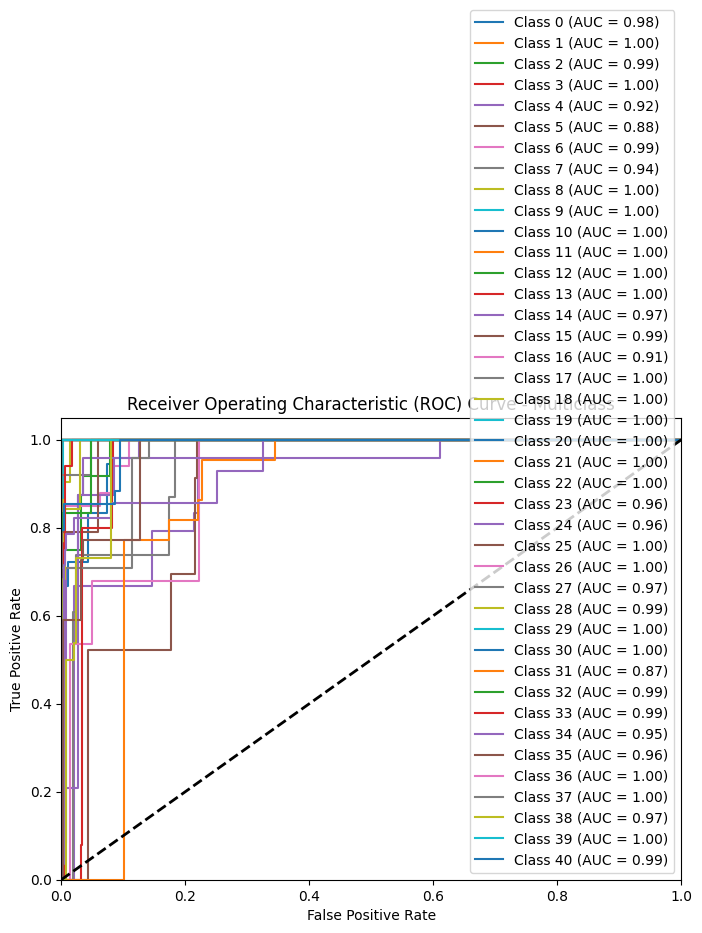

In [486]:
# Train a classifier using One-vs-Rest strategy (Logistic Regression in this example)
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # Area Under the Curve (AUC)

n_classes = y_train_bin.shape[1]

# Calculate ROC curves and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

# **Cross Validation**

In [487]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation and obtain scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(random_forest_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross Validation Scores are {}".format(cross_val_results))

# Print the average cross-validation score (test data accuracy)
print("Average Cross Validation (Test data accuracy): {}".format(cross_val_results.mean()))


Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation (Test data accuracy): 1.0


# **Learning Curve**

In [488]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score


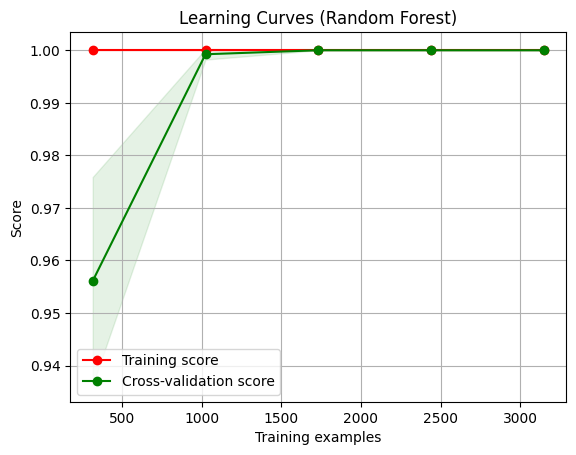

In [489]:
# Plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(random_forest_model, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

# **Validation Curve**

In [490]:
from sklearn.model_selection import validation_curve

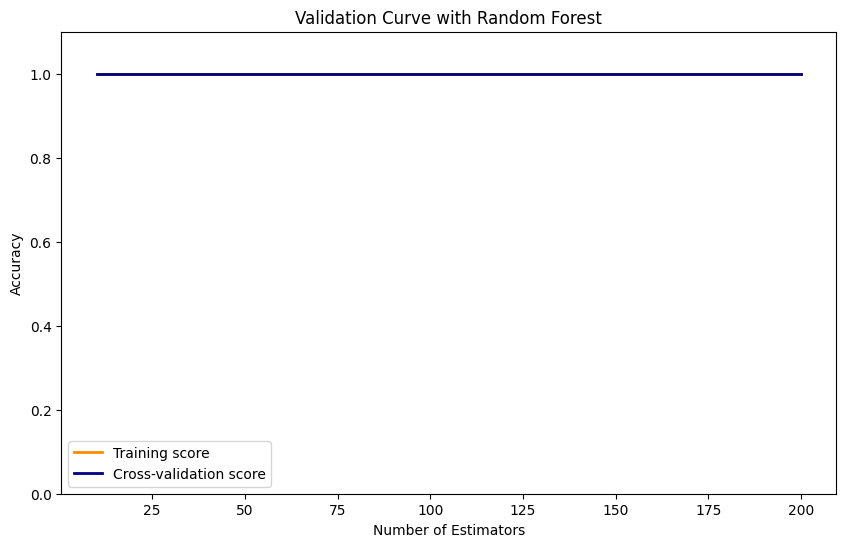

In [491]:
# Define the hyperparameter values to be tested
param_range = [10, 50, 100, 150, 200]

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Generate validation curve
train_scores, test_scores = validation_curve(
    rf, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=4)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


# **Applying Diffrent ML Model**

In [492]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc

# **Logistic Regration**

In [493]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [494]:
lgr.score(X_train, y_train)*100

86.4329268292683

In [495]:
lgr.score(X_test, y_test)*100
pred_lgr=lgr.predict(X_test)

**Classification Report of LR**

In [496]:
from sklearn.metrics import classification_report
cr_lgr = classification_report(y_test,pred_lgr)
print(cr_lgr)

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.78      0.93      0.85        30
           2       0.47      0.75      0.58        24
           3       1.00      1.00      1.00        25
           4       0.41      0.54      0.46        24
           5       0.92      0.52      0.67        23
           6       0.70      0.48      0.57        33
           7       0.61      0.61      0.61        23
           8       1.00      1.00      1.00        21
           9       0.81      0.87      0.84        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       0.92      0.79      0.85        29
          14       0.71      0.92      0.80        24
          15       0.68      0.79      0.73        19
          16       1.00      0.68      0.81        28
          17       0.12    

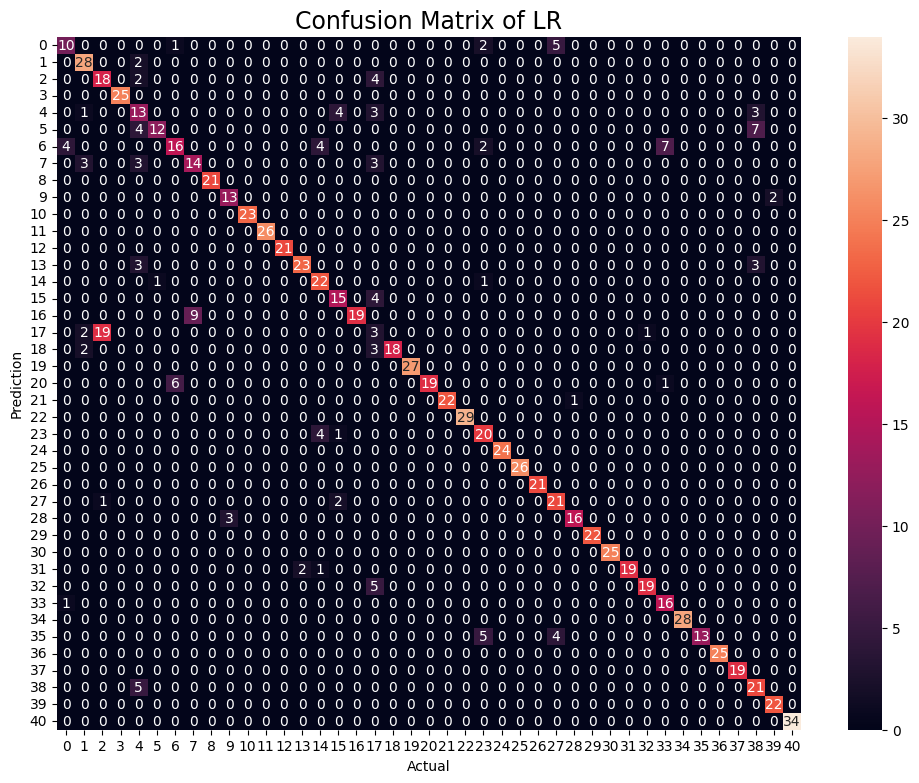

Accuracy   : 0.8414634146341463


In [497]:
# compute the confusion matrix
cm_lgr = confusion_matrix(y_test,pred_lgr)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_lgr,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of LR',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_lr = accuracy_score(y_test, pred_lgr)
print("Accuracy   :", accuracy_lr)

# **KNeighborsClassifier**

In [498]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
pred_kn = kn.predict(X_test)
cr_kn = classification_report(y_test,pred_kn)
print(cr_kn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      0.83      0.90        23
           6       1.00      1.00      1.00        33
           7       0.85      1.00      0.92        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

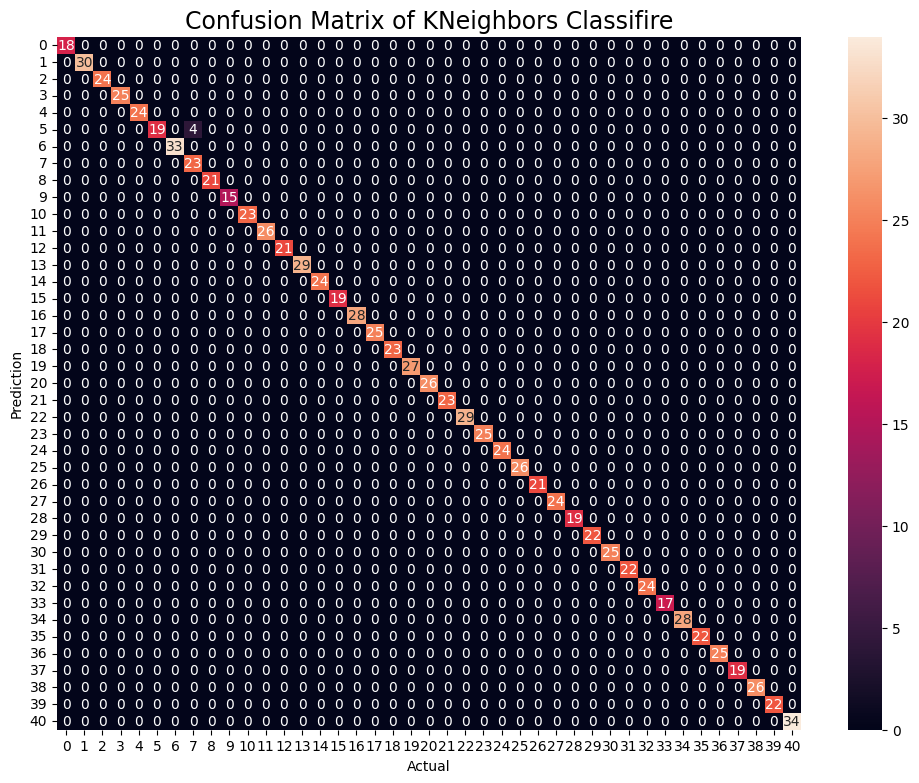

Accuracy   : 1.00


In [499]:
cm_kn = confusion_matrix(y_test,pred_kn)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_kn,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of KNeighbors Classifire',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_knc = accuracy_score(y_test, pred_kn)
print("Accuracy   : {:.2f}".format(accuracy_knc))

# **DecisionTreeClassifier**

In [500]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test, y_test)
pred_dt = dt.predict(X_test)
cr_dt = classification_report(y_test,pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

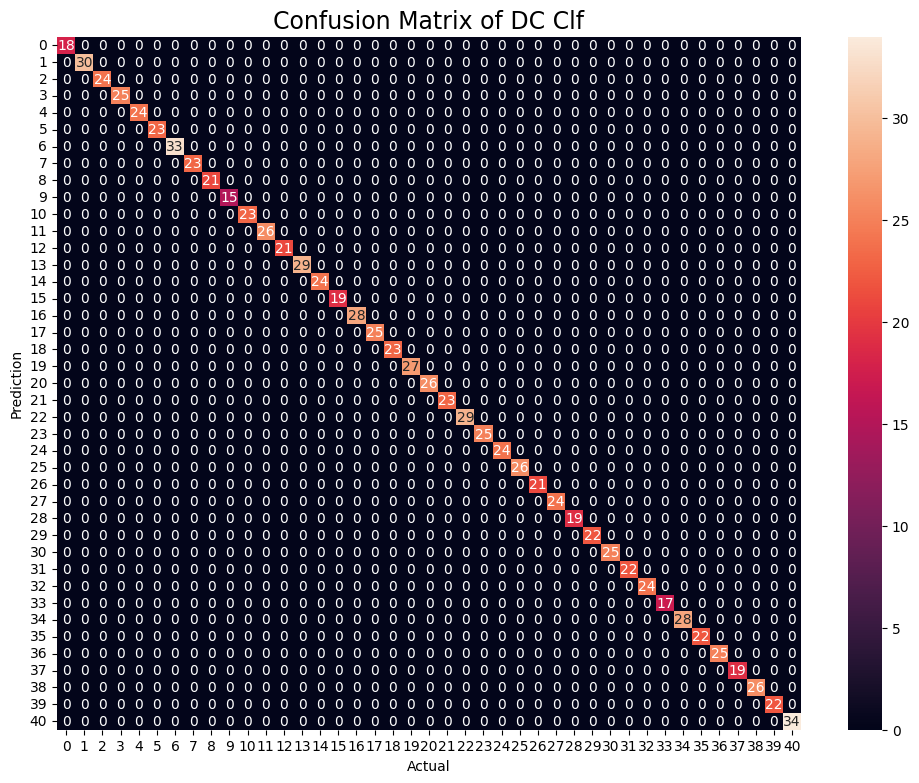

Accuracy   : 1.00


In [501]:
cm_dt = confusion_matrix(y_test,pred_dt)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_dt,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of DC Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_dt = accuracy_score(y_test, pred_dt)
print("Accuracy   : {:.2f}".format(accuracy_dt))

In [502]:
# from sklearn import tree
# plt.figure(figsize=(30, 20))
# features= df.columns
# tree.plot_tree(dt, feature_names = features) #plotting the decision tree
# plt.show()

# **RandomForestClassifier**

In [503]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
cr_rf = classification_report(y_test,pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

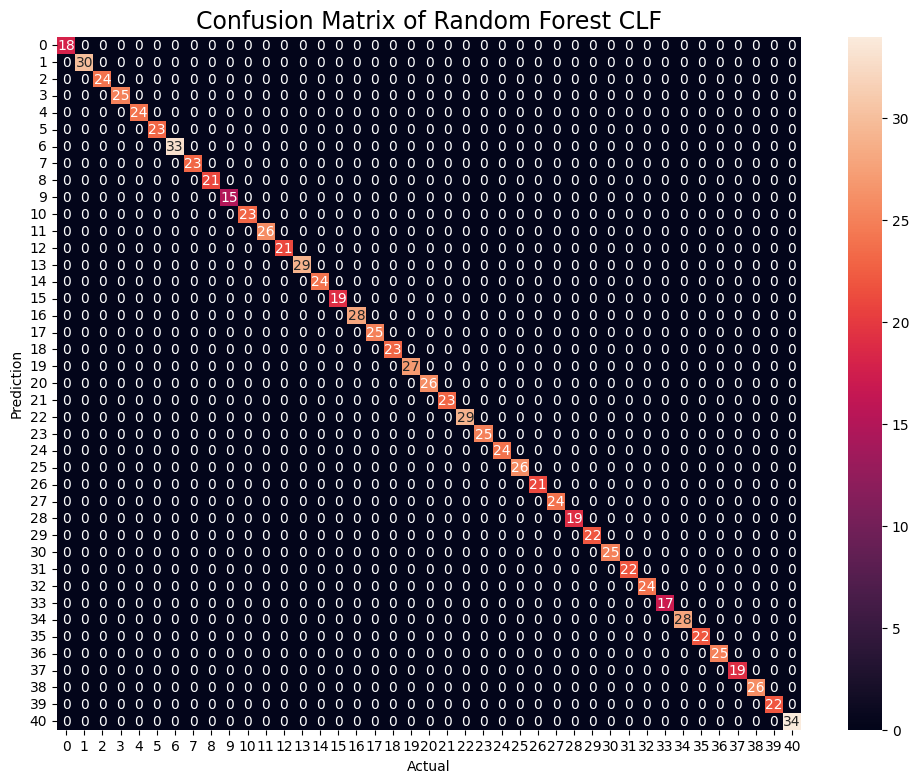

Accuracy   : 1.00


In [504]:
cm_rf = confusion_matrix(y_test,pred_rf)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_rf,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of Random Forest CLF',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy   : {:.2f}".format(accuracy_rf))

# **Support Vector Machine**

In [505]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
sv.score(X_test, y_test)
pred_svm = sv.predict(X_test)
cr_svm = classification_report(y_test,pred_svm)
print(cr_svm)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.90      0.87      0.88        30
           2       0.71      0.92      0.80        24
           3       1.00      1.00      1.00        25
           4       1.00      0.71      0.83        24
           5       1.00      0.83      0.90        23
           6       0.95      0.64      0.76        33
           7       0.85      1.00      0.92        23
           8       1.00      1.00      1.00        21
           9       0.68      1.00      0.81        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      0.96      0.98        24
          15       1.00      0.79      0.88        19
          16       0.90      1.00      0.95        28
          17       0.86    

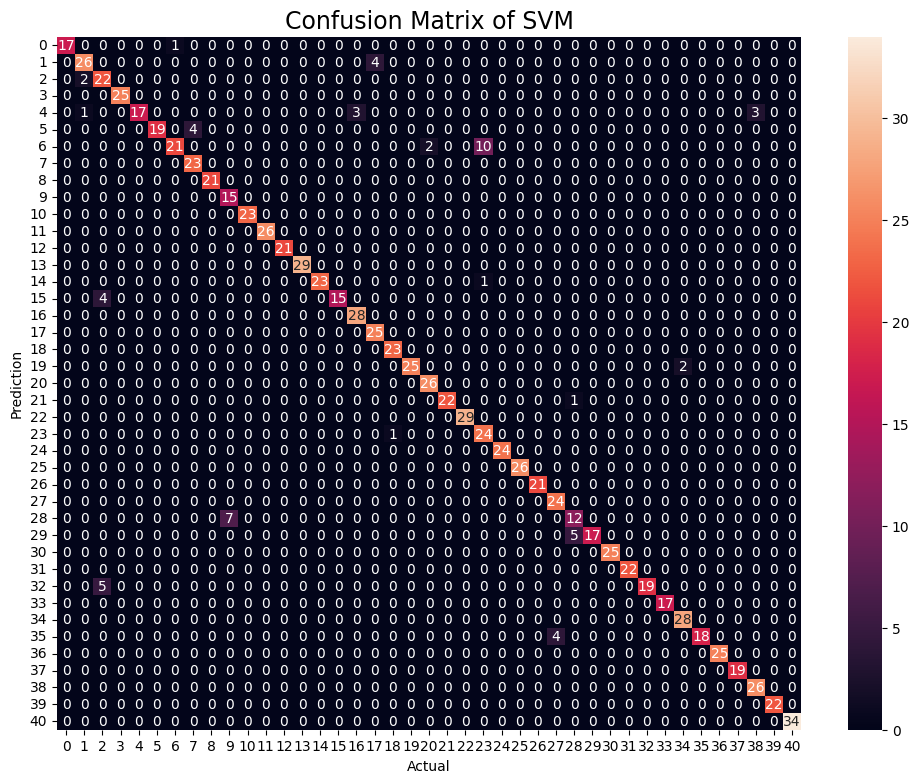

Accuracy   : 0.94


In [506]:
cm_svm = confusion_matrix(y_test,pred_svm)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_svm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of SVM',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   : {:.2f}".format(accuracy_svm))

# **Bagging Classifier**

In [507]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)

# features= df.columns
# plt.figure(figsize=(30, 20))
# plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))

pred_bagg = bagg.predict(X_test)
cr_bagg=classification_report(y_test, bagg.predict(X_test))
print(cr_bagg)

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.0

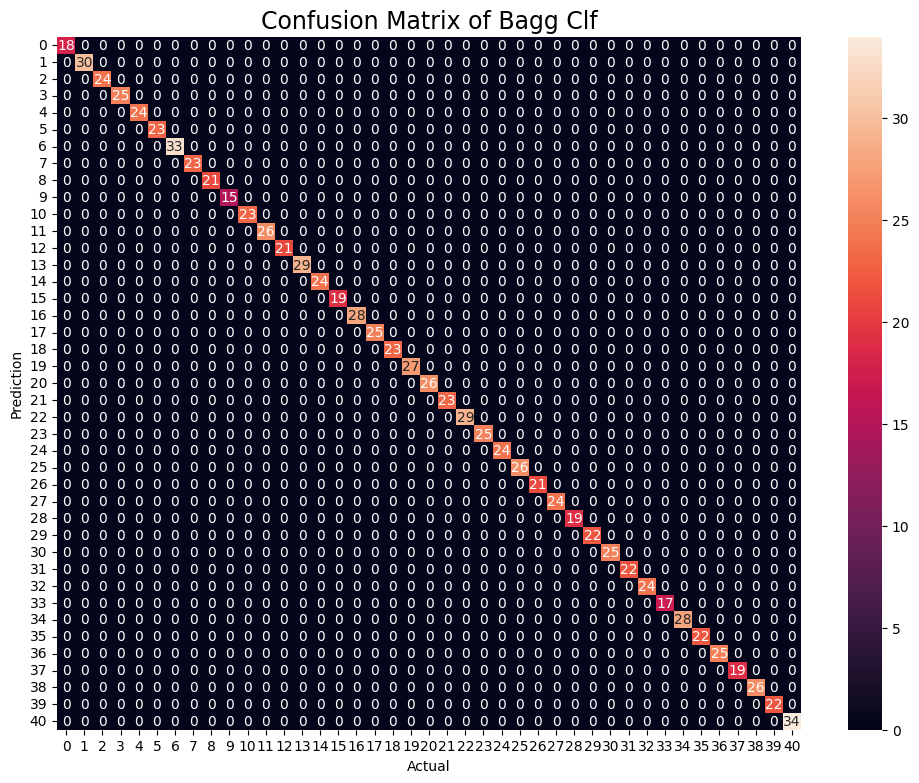

Accuracy   : 1.00


In [508]:
cm_bagg = confusion_matrix(y_test,pred_bagg)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_bagg,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of Bagg Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_bagg = accuracy_score(y_test,pred_bagg)
print("Accuracy   : {:.2f}".format(accuracy_bagg))

# **AdaBoost Classifier**

In [509]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
base_learner = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_learner,n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

# plt.figure(figsize=(30, 20))
# plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))

pred_ada = ada.predict(X_test)
cr_ada=classification_report(y_test, ada.predict(X_test))
print(cr_ada)


Train data accuracy: 0.0741869918699187
Test data accuracy: 0.06910569105691057
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       1.00      1.00      1.00        30
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        21
           9       0.02      1.00      0.03        15
          10       1.00      1.00      1.00        23
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        19
 

In [510]:
cross_val_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.0748731  0.0978399  0.0978399  0.0978399  0.07496823]
Mean Cross-Validation Score: 0.08867220505808217


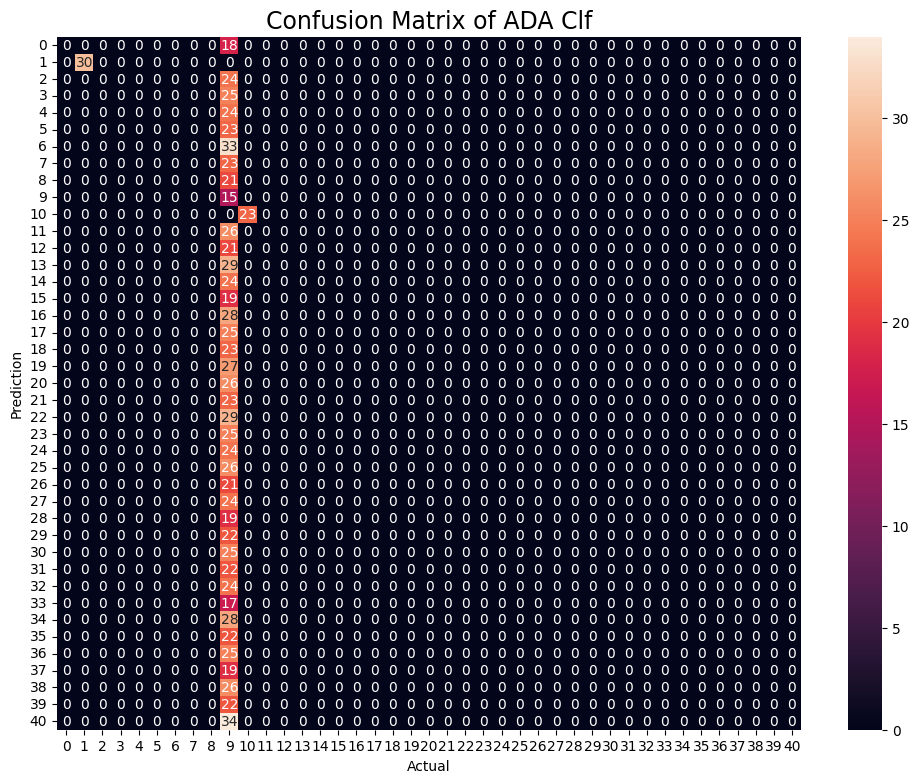

Accuracy   : 0.07


In [511]:
cm_ada = confusion_matrix(y_test,pred_ada)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_ada,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of ADA Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_ada = accuracy_score(y_test,pred_ada)
print("Accuracy   : {:.2f}".format(accuracy_ada))

# **Bernoulli Naive Bayes**

In [512]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))

pred_bnb = bnb.predict(X_test)
cr_bnb=classification_report(y_test, bnb.predict(X_test))
print(cr_bnb)

Train data accuracy: 0.22459349593495934
Test data accuracy: 0.18089430894308944
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        24
           5       0.07      0.52      0.12        23
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        21
           9       0.17      0.60      0.27        15
          10       1.00      0.57      0.72        23
          11       1.00      0.46      0.63        26
          12       0.18      0.57      0.27        21
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        24
          15       0.12      0.47      0.19        19


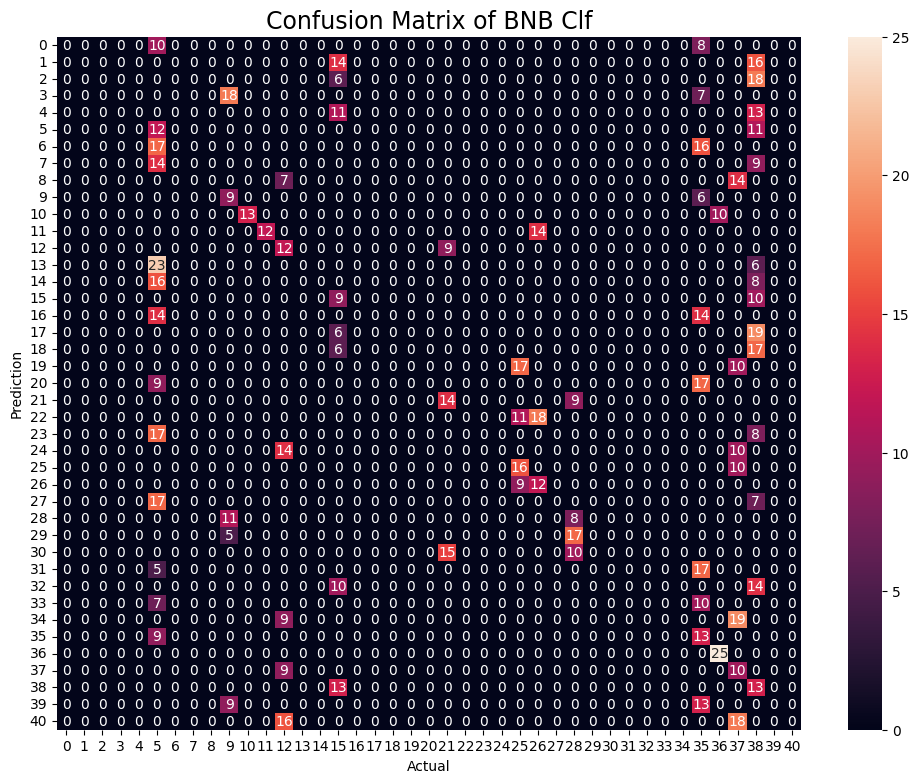

Accuracy   : 0.18


In [513]:
cm_bnb = confusion_matrix(y_test,pred_bnb)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_bnb,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of BNB Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_bnb = accuracy_score(y_test,pred_bnb)
print("Accuracy   : {:.2f}".format(accuracy_bnb))

## **Stochastic gradient descent**

In [514]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = sgd.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = sgd.predict(X_test)))


pred_sgd = sgd.predict(X_test)

cr_sgd=classification_report(y_test, sgd.predict(X_test))
print(cr_sgd)

Train data accuracy: 0.6745426829268293
Test data accuracy: 0.6615853658536586
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24
           3       1.00      0.96      0.98        25
           4       0.00      0.00      0.00        24
           5       0.21      0.70      0.32        23
           6       1.00      0.61      0.75        33
           7       0.00      0.00      0.00        23
           8       1.00      0.76      0.86        21
           9       0.59      0.87      0.70        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       0.57      1.00      0.72        21
          13       1.00      0.79      0.88        29
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        19
  

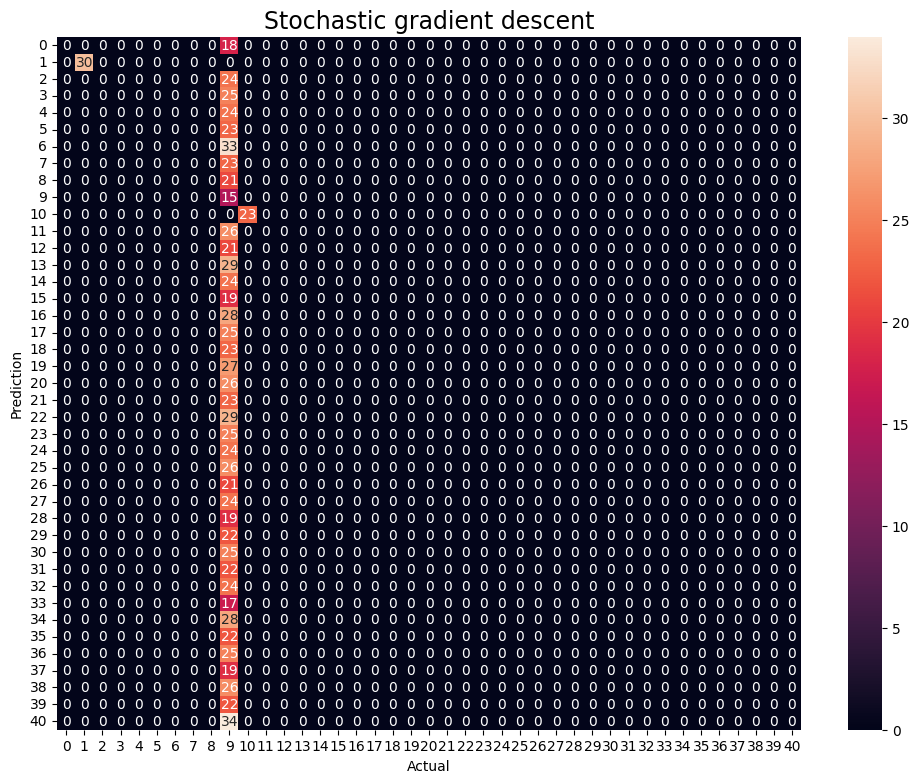

Accuracy   : 0.66


In [515]:
cm_sgd = confusion_matrix(y_test,pred_sgd)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_ada,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Stochastic gradient descent',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_sgd = accuracy_score(y_test,pred_sgd)
print("Accuracy   : {:.2f}".format(accuracy_sgd))

# **Extreme Gradient Boosting**

In [516]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()

In [517]:
model_xgb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model_xgb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model_xgb.predict(X_test)))

pred_xgb = model_xgb.predict(X_test)
cr_xgb=classification_report(y_test, model_xgb.predict(X_test))
print(cr_xgb)

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.0

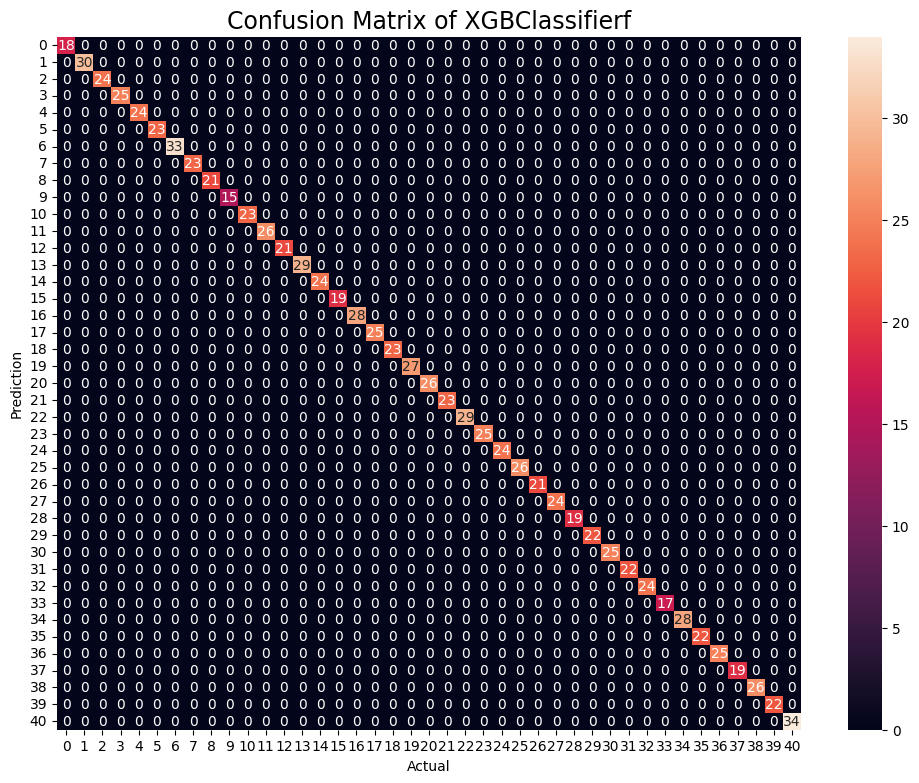

Accuracy   : 1.00


In [518]:
cm_xgb = confusion_matrix(y_test,pred_xgb)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm_xgb,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of XGBClassifierf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_xgb = accuracy_score(y_test,pred_xgb)
print("Accuracy   : {:.2f}".format(accuracy_xgb))

In [519]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

In [520]:
# model = Sequential()
# model.add(LSTM(50, input_shape=(17, 41)))
# model.add(Dense(1))

# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# loss = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")

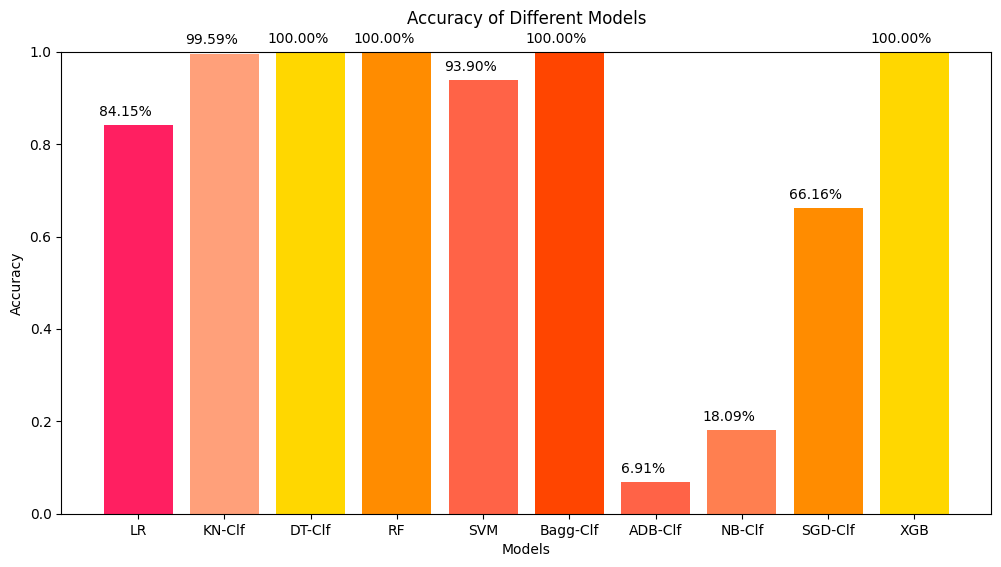

In [521]:
# Your list of models and accuracy values
models = ['LR', 'KN-Clf', 'DT-Clf', 'RF', 'SVM', 'Bagg-Clf', 'ADB-Clf', 'NB-Clf', 'SGD-Clf', 'XGB']
accuracies = [accuracy_lr, accuracy_knc, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_bagg, accuracy_ada, accuracy_bnb, accuracy_sgd, accuracy_xgb]

# Warm colors for the bar graph
warm_colors = ['#FF1F61', '#FFA07A', '#FFD700', '#FF8C00', '#FF6347', '#FF4500', '#FF6347', '#FF7F50', '#FF8C00', '#FFD700']

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Adding text labels with accuracy values as percentages on top of each bar
for model, acc, color in zip(models, accuracies, warm_colors):
    bar = plt.bar(model, acc, color=color)
    plt.text(bar[0].get_x() + bar[0].get_width() / 2 - 0.15, bar[0].get_height() + 0.02, f'{acc * 100:.2f}%', ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models', pad=20)  # Increase the padding for the title
plt.ylim(0, 1)
plt.show()

In [522]:
from tabulate import tabulate

# Model name and accuracy
data_accu = {
    'Model Name': ['LR', 'KN-Clf', 'DT-Clf', 'RF', 'SVM', 'Bagg-Clf', 'ADB-Clf', 'NB-Clf', 'SGD-Clf', 'XGB'],
    'Accuracy (%)': [accuracy_lr * 100, accuracy_knc * 100, accuracy_dt * 100, accuracy_rf * 100, accuracy_svm * 100, accuracy_bagg * 100, accuracy_ada * 100, accuracy_bnb * 100, accuracy_sgd * 100, accuracy_xgb * 100]
}

# Create a DataFrame
df = pd.DataFrame(data_accu)

# Display the table
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=('.2f', '.2f'))
print(table)


╒══════════════╤════════════════╕
│ Model Name   │   Accuracy (%) │
╞══════════════╪════════════════╡
│ LR           │          84.15 │
├──────────────┼────────────────┤
│ KN-Clf       │          99.59 │
├──────────────┼────────────────┤
│ DT-Clf       │         100.00 │
├──────────────┼────────────────┤
│ RF           │         100.00 │
├──────────────┼────────────────┤
│ SVM          │          93.90 │
├──────────────┼────────────────┤
│ Bagg-Clf     │         100.00 │
├──────────────┼────────────────┤
│ ADB-Clf      │           6.91 │
├──────────────┼────────────────┤
│ NB-Clf       │          18.09 │
├──────────────┼────────────────┤
│ SGD-Clf      │          66.16 │
├──────────────┼────────────────┤
│ XGB          │         100.00 │
╘══════════════╧════════════════╛


# **Hybrid Model**

In [523]:
# Combine individual classifiers into a list
classifiers = [dt, rf, bagg, kn]

# Initialize an empty list to store individual classifier predictions
predictions = []

# Train each classifier and make predictions
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_hybrid = classifier.predict(X_test)
    predictions.append(y_pred_hybrid)

# Combine predictions using a majority voting approach (simple averaging)
hybrid_predictions = pd.DataFrame(predictions).mode(axis=0).iloc[0]

# Evaluate the performance of the hybrid model
accuracy_hybrid = accuracy_score(y_test, hybrid_predictions)
print(f"Accuracy of the Hybrid Model: {accuracy_hybrid}")

# Generate Classification Report
classification_report_hybrid = classification_report(y_test, hybrid_predictions)
print("Classification Report for the Hybrid Model:\n", classification_report_hybrid)


Accuracy of the Hybrid Model: 1.0
Classification Report for the Hybrid Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
  

In [524]:
# plt.figure(figsize=(12, 9))
# #Plot the confusion matrix.
# sns.heatmap(cm,
#             annot=True,
#             fmt='g')
# plt.ylabel('Prediction',fontsize=10)
# plt.xlabel('Actual',fontsize=10)
# plt.title('Confusion Matrix of Hybrid Model',fontsize=17)
# plt.show()

# # Finding precision and recall
# accuracy = accuracy_score(y_test,y_pred_hybrid)
# print("Accuracy   : {:.2f}".format(accuracy_hybrid))